# HK-cities Dataset

## Characteristics Only

### Data import and drop unnecessary rows

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

hk_cities = pd.read_csv('./Data/HK_cities.csv', dtype={'plz': object, 'zimmeranzahl': object, 'click_customer': object})

df_hk_cities = pd.DataFrame(hk_cities)

#All columns sorted by category
#Independent and dependent variabels, columns which will not be dropped: edat, zimmeranzahl, schlafzimmer, badezimmer, wohnflaeche, grundstuecksflaeche, objektzustand, parkplatz, price_sqm, kaufpreis
time_information = ['adat']
object_features = [ 'ausstattung', 'denkmalobjekt', 'einbaukueche', 'ferienhaus', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Haus']
general_object_information = ['bauphase', 'einliegerwohnung', 'foerderung', 'immobilientyp', 'kaufvermietet', 'mieteinnahmenpromonat', 'nebenraeume', 'rollstuhlgerecht']
area_information = ['nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'spell', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']

columns_to_drop = time_information + object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_hk_cities.drop(columns=columns_to_drop, axis=1, inplace=True)

df_hk_cities.describe(include='all')

,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,energieeffizienzklasse,objektzustand,edat,price_sqm
count,3.675830e+05,367583,3.675830e+05,301652.000000,367583.000000,367583,367583,367583,367583,367583,367583,367583,367583,367583,367583.000000
unique,NaN,1990,NaN,NaN,NaN,5146,69,31,19,3,3,10,11,192,NaN
top,NaN,12623,NaN,NaN,NaN,Other missing,5,Other missing,Other missing,No,Other missing,Not specified,Not specified,2022m12,NaN
freq,NaN,4741,NaN,NaN,NaN,17599,100391,161485,129915,157197,257098,327925,130070,4452,NaN
mean,8.208446e+07,NaN,4.800137e+05,1973.217453,173.791503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2825.887905
std,2.919146e+07,NaN,3.417242e+05,39.497884,86.250859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1512.571668
min,2.558698e+07,NaN,2.526000e+04,1500.000000,60.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.250700
25%,5.710773e+07,NaN,2.490000e+05,1952.000000,121.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1733.337950
50%,7.709574e+07,NaN,3.800000e+05,1978.000000,145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.875700
75%,1.073314e+08,NaN,5.990000e+05,2008.000000,196.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.000000


### Data Cleaning of relevant columns

In [71]:
df_hk_cities['edat_year'] = df_hk_cities['edat'].astype(str).str[:4]
df_hk_cities['edat_year'] = pd.to_numeric(df_hk_cities['edat_year'])

df_original = df_hk_cities.copy(deep=True)

df_characteristics = df_original[df_original['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['edat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]

df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['grundstuecksflaeche'].notna()]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['grundstuecksflaeche'].str.contains("Implausible value")]
df_characteristics['grundstuecksflaeche'] = pd.to_numeric(df_characteristics['grundstuecksflaeche'])
df_characteristics = df_characteristics[(df_characteristics['grundstuecksflaeche'] > 0) & (df_characteristics['grundstuecksflaeche'] < 5000)]

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes

df_characteristics = df_characteristics[~df_characteristics['parkplatz'].str.contains("Other missing")]
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].astype('category')
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['parkplatz'] = df_characteristics['parkplatz'].cat.codes

df_characteristics = df_characteristics[~df_characteristics['keller'].str.contains("Other missing")]
df_characteristics['keller'] = df_characteristics['keller'].astype('category')
df_characteristics['keller'] = df_characteristics['keller'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['keller'] = df_characteristics['keller'].cat.codes

df_characteristics = df_characteristics[~df_characteristics['energieeffizienzklasse'].str.contains("Not specified")]
df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].astype('category')
df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].cat.reorder_categories(['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'APLUS'], ordered=True)
df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].cat.codes

print(df_characteristics.shape)
df_characteristics.head()

(12678, 17)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,parkplatz,energieeffizienzklasse,objektzustand,edat,price_sqm,edat_year,age
18215,88970356,21035,359000.0,1998.0,115.0,199.0,5.0,4,1,0,1,5,2,2016m9,3121.7390,2016,18.0
18219,88059035,22419,289000.0,1961.0,70.0,117.0,4.0,2,1,1,1,1,2,2016m5,4128.5713,2016,55.0
18251,89573538,22393,620000.0,2003.0,132.0,350.0,4.0,3,1,0,1,5,6,2016m8,4696.9697,2016,13.0
18264,90072320,21149,369000.0,1982.0,133.0,601.0,4.0,3,2,1,1,3,3,2016m9,2774.4360,2016,34.0
18283,89611566,22549,429000.0,1950.0,80.0,450.0,3.0,2,1,0,1,0,2,2016m11,5362.5000,2016,66.0


### Overview of the Sample

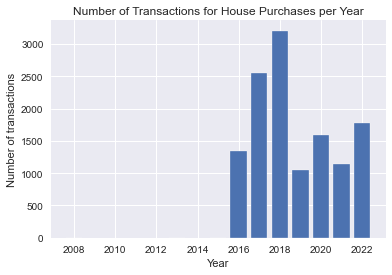

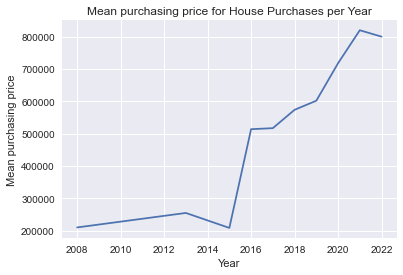

                  ort  transactions
0              Berlin          1968
1              Bremen          1301
2             Hamburg          1177
3                Köln          1151
4            Dortmund           942
5            Duisburg           919
6            Nürnberg           737
7            Hannover           659
8          Düsseldorf           637
9             München           597
10  Frankfurt am Main           542
11          Stuttgart           518
12              Essen           507


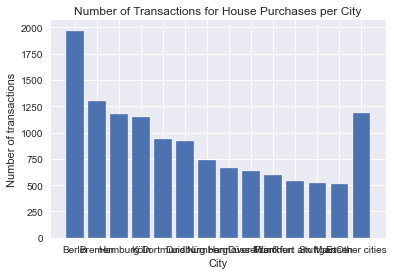

In [72]:
df_data_overview = df_characteristics.copy(deep=True)
number_of_transactions_per_year = df_data_overview.groupby('edat_year')['price_sqm'].count()
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per Year')
plt.show()

average_price_sqm_per_year = df_data_overview.groupby('edat_year')['kaufpreis'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean purchasing price')
plt.title('Mean purchasing price for House Purchases per Year')
plt.show()


plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = pd.DataFrame(plz_city)

df_data_overview = pd.merge(df_data_overview, df_plz_city, how="left", on="plz")

big_cities = ['Hamburg', 'Hannover', 'Bremen', 'Düsseldorf', 'Essen', 'Duisburg', 'Köln', 'Dortmund', 'Frankfurt am Main', 'Stuttgart', 'München', 'Nürnberg', 'Berlin', 'Dresden', 'Leizig']
df_big_cities = df_data_overview[df_data_overview['ort'].isin(big_cities)]
df_not_big_cities = df_data_overview[~df_data_overview['ort'].isin(big_cities)]
number_of_transaction_not_big_cities = df_not_big_cities['obid'].count()
number_of_transactions_big_cities = df_big_cities['obid'].count()

count_by_ort = df_big_cities.groupby('ort')['obid'].count().sort_values(ascending=False).reset_index(name='transactions')
print(count_by_ort)
new_row = {'ort': 'Other cities', 'transactions': number_of_transaction_not_big_cities}
count_by_ort.loc[len(count_by_ort)] = new_row

plt.bar(count_by_ort['ort'], count_by_ort['transactions'])
plt.xlabel("City")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per City')
plt.show()

### Regression on housing characteristics only

In [535]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [561]:
housing_model = ols("""kaufpreis ~ wohnflaeche 
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + objektzustand
                                            + parkplatz
                                            + age
                                            + keller
                                            + energieeffizienzklasse
                                            + grundstuecksflaeche""", data=df_characteristics).fit()
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

## Macroeconomic factors only

### Merge interest rate, construction investment and household income

In [537]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_original['date_quarter'] = df_original.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['obid', 'plz', 'baujahr', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'edat_year', 'keller', 'energieeffizienzklasse'], axis=1, inplace=True)
df_original = df_original.groupby('date_quarter', as_index=False).mean()

interest_rate = pd.read_csv('./Data/Macroeconomic Data/Interest-rate.csv')
df_interest_rate = pd.DataFrame(interest_rate)
df_original = pd.merge(df_original, df_interest_rate, how="inner", on="date_quarter")

construction_investment = pd.read_csv('./Data/Macroeconomic Data/Construction-investment.csv')
df_construction_investment = pd.DataFrame(construction_investment)
df_original = pd.merge(df_original, df_construction_investment, how="inner", on="date_quarter")

household_income = pd.read_csv('./Data/Macroeconomic Data/Household-income.csv')
df_household_income = pd.DataFrame(household_income)
df_original = pd.merge(df_original, df_household_income, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income
0,2007-Q1,303232.918568,1940.250881,4.737,5.410,1584484
1,2007-Q2,306227.071878,1962.724220,4.899,5.141,1568216
2,2007-Q3,309530.774514,1958.637008,5.136,5.148,1579972
3,2007-Q4,308506.226560,1951.208605,5.034,5.133,1633608
4,2008-Q1,299825.650740,1901.326637,4.946,5.241,1626592


### Clean Unemployment and merge

In [538]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)

def convert_date_unemployment(x):
    date_string = str(x)
    date = date_string.split('-')[-1]
    
    if (date == 'Januar' or date == 'Februar' or date == 'März'):
        quarter = '1'
    elif (date == 'April' or date == 'Mai' or date == 'Juni'):
        quarter = '2'
    elif (date == 'Juli' or date == 'August' or date == 'September'):
        quarter = '3'
    elif (date == 'Oktober' or date == 'November' or date == 'Dezember'):
        quarter = '4'
    else:
        quarter = '0'
    year = date_string.split('-')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_unemployment_rate['date_quarter'] = df_unemployment_rate.apply(lambda x: convert_date_unemployment(x['Jahr_Monat']), axis = 1)
df_unemployment_rate = df_unemployment_rate.groupby('date_quarter', as_index=False).mean()
df_unemployment_rate.drop(columns=['Erwerbspersonen', 'Erwerbstätige', 'Erwerbslose'], axis=1, inplace=True)

df_original = pd.merge(df_original, df_unemployment_rate, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote
0,2007-Q1,303232.918568,1940.250881,4.737,5.410,1584484,9.133333
1,2007-Q2,306227.071878,1962.724220,4.899,5.141,1568216,8.766667
2,2007-Q3,309530.774514,1958.637008,5.136,5.148,1579972,8.400000
3,2007-Q4,308506.226560,1951.208605,5.034,5.133,1633608,8.133333
4,2008-Q1,299825.650740,1901.326637,4.946,5.241,1626592,7.833333


### Clean planning permissions and merge

In [539]:
planning_permissions = pd.read_csv('./Data/Macroeconomic Data/Planning-permissions.csv')
df_planning_permissions_original = pd.DataFrame(planning_permissions)

df_planning_permissions = pd.DataFrame(np.repeat(df_planning_permissions_original.values, 4, axis=0))
df_planning_permissions.columns = df_planning_permissions_original.columns

df_planning_permissions.head()

def rowIndex(row):
    return row.name
df_planning_permissions['rowIndex'] = df_planning_permissions.apply(rowIndex, axis=1)

def add_quarter(Jahr, rowIndex):
    if (rowIndex % 4 == 0):
        quarter = 'Q1'
    elif (rowIndex % 4 == 1):
        quarter = 'Q2'
    elif (rowIndex % 4 == 2):
        quarter = 'Q3'
    elif (rowIndex % 4 == 3):
        quarter = 'Q4'
    else:
        quarter = '0'
    date_quarter = Jahr.astype(str) + '-' + quarter
    return date_quarter
df_planning_permissions['date_quarter'] = df_planning_permissions.apply(lambda x: add_quarter(x.Jahr, x.rowIndex), axis = 1)

df_planning_permissions.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)
df_planning_permissions['Baugenehmigungen'] = df_planning_permissions['Baugenehmigungen'].div(4)

df_original = pd.merge(df_original, df_planning_permissions, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen
0,2007-Q1,303232.918568,1940.250881,4.737,5.410,1584484,9.133333,45.50
1,2007-Q2,306227.071878,1962.724220,4.899,5.141,1568216,8.766667,45.50
2,2007-Q3,309530.774514,1958.637008,5.136,5.148,1579972,8.400000,45.50
3,2007-Q4,308506.226560,1951.208605,5.034,5.133,1633608,8.133333,45.50
4,2008-Q1,299825.650740,1901.326637,4.946,5.241,1626592,7.833333,43.75


### Number of transactions

In [540]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_hk_cities['date_quarter'] = df_hk_cities.apply(lambda x: convert_date(x['edat']), axis = 1)


df_hk_cities = df_hk_cities.groupby('date_quarter', as_index=False).count()
df_hk_cities['transactions'] = df_hk_cities['kaufpreis']
df_hk_cities.drop(columns=['obid', 'plz', 'kaufpreis', 'baujahr', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'price_sqm', 'edat_year', 'keller', 'energieeffizienzklasse'], axis=1, inplace=True)

df_original = pd.merge(df_original, df_hk_cities, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen,transactions
0,2007-Q1,303232.918568,1940.250881,4.737,5.410,1584484,9.133333,45.50,5616
1,2007-Q2,306227.071878,1962.724220,4.899,5.141,1568216,8.766667,45.50,5740
2,2007-Q3,309530.774514,1958.637008,5.136,5.148,1579972,8.400000,45.50,6001
3,2007-Q4,308506.226560,1951.208605,5.034,5.133,1633608,8.133333,45.50,5569
4,2008-Q1,299825.650740,1901.326637,4.946,5.241,1626592,7.833333,43.75,7255


### Regression analysis Macroeconomic factors only

In [541]:
housing_model = ols("""kaufpreis ~ interest_rate 
                                            + Erwerbslosenquote
                                            + household_income
                                            + housing_construction_investment
                                            + Baugenehmigungen
                                            +transactions""", data=df_original).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


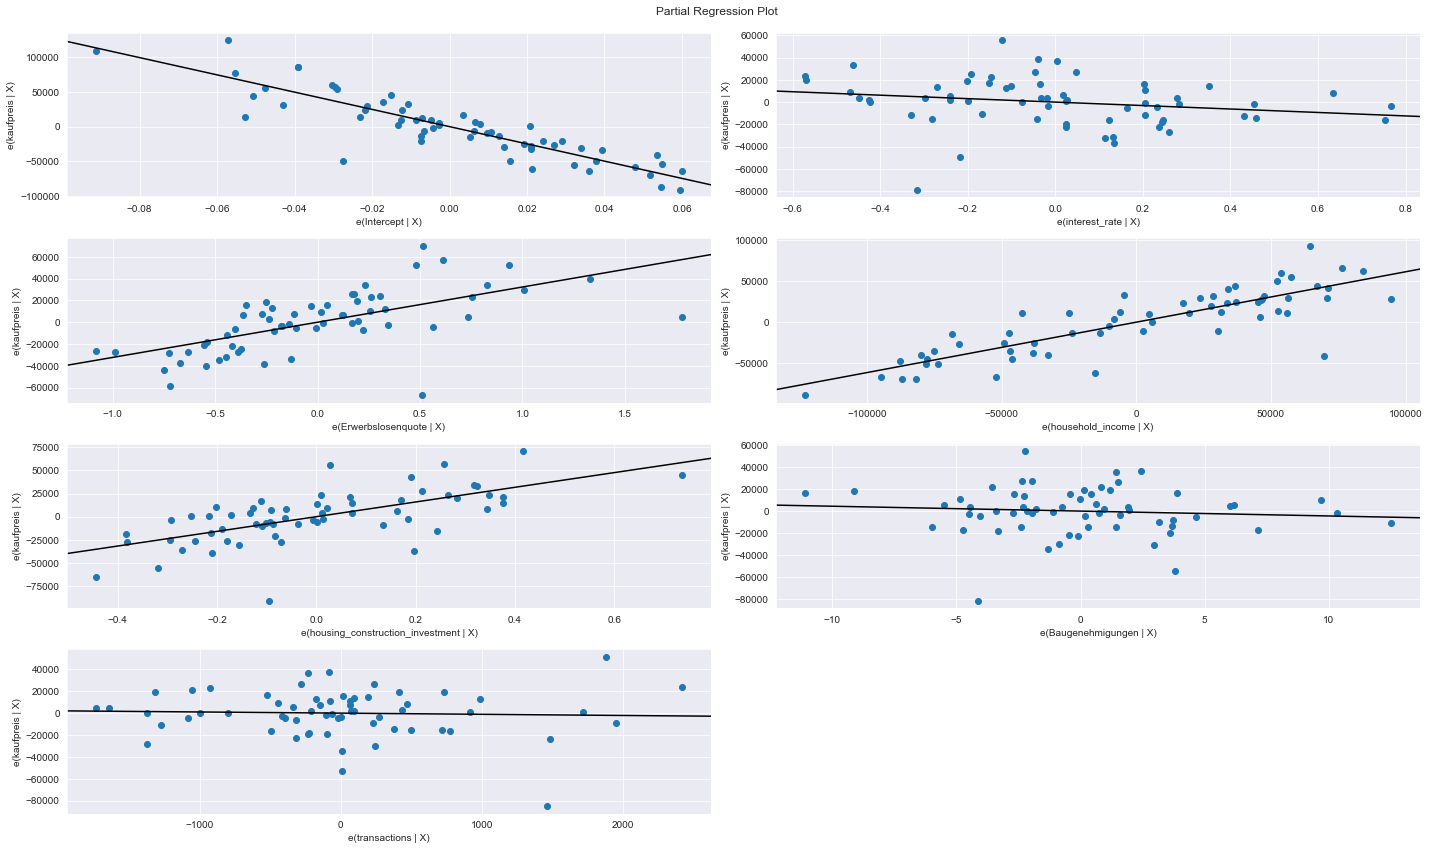

In [542]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

## Characteristics and Macroeconomic factors combined

### Merge of characteristics and macroeconomic factors dataset

In [543]:
df_both_factors = df_characteristics.copy(deep=True)

def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_both_factors['date_quarter'] = df_both_factors.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['kaufpreis', 'price_sqm'], axis=1, inplace=True)
df_both_factors = pd.merge(df_both_factors, df_original, how="left", on="date_quarter")

df_both_factors.head()


(12678, 24)


,obid,plz,kaufpreis,baujahr,wohnflaeche,grundstuecksflaeche,zimmeranzahl,schlafzimmer,badezimmer,keller,...,price_sqm,edat_year,age,date_quarter,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen,transactions
0,88970356,21035,359000.0,1998.0,115.0,199.0,5.0,4,1,0,...,3121.7390,2016,18.0,2016-Q3,1.698,5.997,1948916.0,3.866667,93.75,4349.0
1,88059035,22419,289000.0,1961.0,70.0,117.0,4.0,2,1,1,...,4128.5713,2016,55.0,2016-Q2,1.863,5.975,1930824.0,4.000000,93.75,7093.0
2,89573538,22393,620000.0,2003.0,132.0,350.0,4.0,3,1,0,...,4696.9697,2016,13.0,2016-Q3,1.698,5.997,1948916.0,3.866667,93.75,4349.0
3,90072320,21149,369000.0,1982.0,133.0,601.0,4.0,3,2,1,...,2774.4360,2016,34.0,2016-Q3,1.698,5.997,1948916.0,3.866667,93.75,4349.0
4,89611566,22549,429000.0,1950.0,80.0,450.0,3.0,2,1,0,...,5362.5000,2016,66.0,2016-Q4,1.687,6.036,1978356.0,3.733333,93.75,6451.0


### Regression on characteristics and macroeconomic factors

In [545]:
housing_model = ols("""kaufpreis ~ interest_rate 
                                            + Erwerbslosenquote
                                            + household_income
                                            + housing_construction_investment
                                            + Baugenehmigungen
                                            +transactions
                                            + wohnflaeche
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + objektzustand
                                            + parkplatz
                                            + age
                                            + keller
                                            + energieeffizienzklasse
                                            + grundstuecksflaeche""", data=df_both_factors).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())